# Busqueda por Amplitud

A continuacion se ejemplifica la busqueda por amplitud revisada en clase. Para ello se tiene un ejemplo de las ciudades del territorio Ecuatoriano.


In [4]:
# Busqueda en Amplitud - Breadth First Search

# Creamos la clase Nodo
class Node:
    def __init__(self, data, child=None): # Constructor de la clase
        self.data = data
        self.child = None
        self.fathr = None
        self.cost = None
        self.set_child(child)

    def set_child(self, child): # Agregar hijos
        self.child = child
        if self.child is not None:
            for ch in self.child:
                ch.fathr = self
            
    def equal(self, node): # Igual al equals de Java
        if self.data == node.data:
            return True
        else:
            return False

    def on_list(self, node_list): # Verfiicar su el nodo esta en la lista
        listed = False
        for n in node_list:
            if self.equal(n):
                listed = True
        return listed

    def __str__(self): # Igual al toString Java
        return str(self.data)

In [44]:
# Implementacion del metodo de busqueda por amplitud
def search_Amplitud_solution(connections, init_state, solution):
    solved = False # Variable para almacenar el estado de la busqueda
    visited_nodes = [] # Nodos visitados
    frontrs_nodes = [] # Nodos en busqueda o lista nodos

    init_node = Node(init_state) # Nodo inicial
    frontrs_nodes.append(init_node)
    while (not solved) and len(frontrs_nodes) != 0:
        node = frontrs_nodes[0]
        # extraer nodo y añadirlo a visitados
        visited_nodes.append(frontrs_nodes.pop(0))
        if node.data == solution: # Preguntar se el nodo obtenido es la solucion
            solved = True
            return node # Retornamos el nodo de la solucion
        else:
            # expandir nodos hijo - ciudades con conexion
            node_data = node.data
            child_list = []
            for chld in connections[node_data]:
                child = Node(chld)
                child_list.append(child)
                if not child.on_list(visited_nodes) and not child.on_list(frontrs_nodes):
                    frontrs_nodes.append(child)
            node.set_child(child_list)

if __name__ == "__main__":
    connections = {
        'Cuenca': {'Riobamba', 'Quito', 'Guayaquil'},
        'Latacunga': {'Ambato', 'Quito'},
        'Esmeraldas': {'Manta'},
        'Manta': {'Guayaquil'},
        'Quito': {'Riobamba', 'Latacunga', 'Cuenca', 'Guayaquil', 'Puyo'},
        'Riobamba': {'Cuenca', 'Quito'},
        'Ambato': {'Latacunga', 'Puyo', 'Guayaquil'},
        'Puyo': {'Ambato', 'Quito'},
        'Machala': {'Guayaquil'},
        'Guayaquil': {'Machala', 'Ambato', 'Quito', 'Cuenca', 'Manta'}
    }

    init_state = 'Cuenca'
    solution = 'Manta'
    solution_node = search_Amplitud_solution(connections, init_state, solution)
    # mostrar resultado
    result = []
    node = solution_node
    if node is not None: 
        while node.fathr is not None:
            result.append(node.data)
            node = node.fathr
        result.append(init_state)
        result.reverse() # Reverso el resultado (Solo para presentar)
        print(result)
    else:
        print("No hay solucion !!!!")

['Cuenca', 'Guayaquil', 'Manta']


# Tarea: Cálculo del factor de ramificación
Realice el cálculo del factor de ramificación del problema de las N reinas (con N = 4). Para ello deberá realizar las siguientes actividades:

Asumir que el factor de ramificación es constante.
Despejar el valor de b
Consultar sitios externos sobre cómo realizar el cálculo

# Agregar la solucion en markdown (Informe)

n=4

d=16


\begin{equation*}
n =
\frac{b^{d+1}-1} {b-1}
\end{equation*}

\begin{equation*}
4 =
\frac{b^{16+1}-1} {b-1}
\end{equation*}


\begin{equation*}
4(b-1) =
{b^{17}-1}
\end{equation*}


\begin{equation*}
4b-4+1 =
{b^{17}}
\end{equation*}


\begin{equation*}
4b-3 =
{b^{17}}
\end{equation*}


\begin{equation*}
-3 =
{b^{17}-4b}
\end{equation*}


\begin{equation*}
{b^{17}-4b} = -3
\end{equation*}


## Practica

Implementar un algoritmo que me permita dibujar las conexiones y los resultados del grafo.

Mediante el uso de la herramienta de Google Maps tomar al su direccion domiciliaria como punto de partida y generar un arbol jerarquico con todos los posibles Hospitales, para ello se debe tener como primer nivel los mas cercanos y a continuacion los demas.


Realizar los calculos para obtener el factor de ramificacion, análisis del algoritmo en términos de completitud, optimalidad, complejidad temporal y complejidad espacial.


Subir el cuaderno con la resolucion

******************************GRAFO******************************


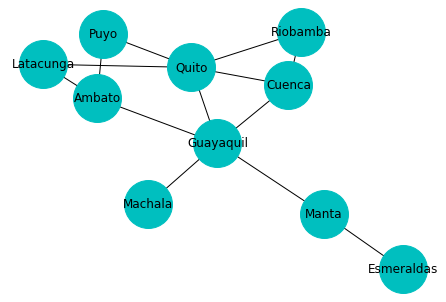

Nodos:  10 ['Cuenca', 'Riobamba', 'Quito', 'Guayaquil', 'Latacunga', 'Puyo', 'Machala', 'Ambato', 'Manta', 'Esmeraldas']
Enlaces:  13 [('Cuenca', 'Riobamba'), ('Cuenca', 'Quito'), ('Cuenca', 'Guayaquil'), ('Riobamba', 'Quito'), ('Quito', 'Guayaquil'), ('Quito', 'Latacunga'), ('Quito', 'Puyo'), ('Guayaquil', 'Machala'), ('Guayaquil', 'Ambato'), ('Guayaquil', 'Manta'), ('Latacunga', 'Ambato'), ('Puyo', 'Ambato'), ('Manta', 'Esmeraldas')]


In [63]:
import networkx as nx
import matplotlib.pyplot as plt
print("******************************GRAFO******************************")
#Crear grafo vacio
G=nx.Graph()

#cCrear el nodo Cuenca
G.add_node("Cuenca")

#Se crean los nodos de las ciudades que se extienden de Cuenca
G.add_nodes_from(["Riobamba","Quito","Guayaquil"])

#Se crean los nodos hacia sus respectivas ciudades de las cuales se extendieden
G.add_edge("Riobamba","Cuenca")
G.add_edge("Quito","Cuenca")
G.add_edge("Guayaquil","Cuenca")
G.add_edge("Quito","Riobamba")
G.add_edge("Cuenca","Riobamba")
G.add_edge("Riobamba","Quito")
G.add_edge("Guayaquil","Quito")
G.add_edge("Cuenca","Quito")
G.add_edge("Latacunga","Quito")
G.add_edge("Puyo","Quito")
G.add_edge("Machala","Guayaquil")
G.add_edge("Ambato","Guayaquil")
G.add_edge("Quito","Guayaquil")
G.add_edge("Cuenca","Guayaquil")
G.add_edge("Manta","Guayaquil")
G.add_edge("Latacunga","Quito")
G.add_edge("Ambato","Latacunga")
G.add_edge("Quito","Latacunga")
G.add_edge("Manta","Esmeraldas")
G.add_edge("Guayaquil","Manta")
G.add_edge("Puyo","Ambato")
G.add_edge("Guayaquil","Ambato")
G.add_edge("Latacunga","Ambato")
G.add_edge("Ambato","Puyo")
G.add_edge("Quito","Puyo")
G.add_edge("Guayaquil","Machala")

#Dibujar el grafo, con su respectivo tamaño, ancho del enlace y asignarle un color al nodo
nx.draw(G, with_labels=True,node_size=2300,width=1,node_color='c')

#Mostrar en pantalla
plt.show()

#Muestra informacion sobre la cantidad y nodos
print ("Nodos: ", G.number_of_nodes(), G.nodes())

#Muestra información sobre la cantidad y enlaces
print ("Enlaces: ", G.number_of_edges(),G.edges())

Mediante el uso de la herramienta de Google Maps tomar al su direccion domiciliaria como punto de partida y generar un arbol jerarquico con todos los posibles Hospitales, para ello se debe tener como primer nivel los mas cercanos y a continuacion los demas.

In [46]:
# Implementar
class Node:
    def __init__(self, data, child=None): # Constructor de la clase
        self.data = data
        self.child = None
        self.fathr = None
        self.cost = None
        self.set_child(child)

    def set_child(self, child): # Agregar hijos
        self.child = child
        if self.child is not None:
            for ch in self.child:
                ch.fathr = self
            
    def equal(self, node): # Igual al equals de Java
        if self.data == node.data:
            return True
        else:
            return False

    def on_list(self, node_list): # Verfiicar su el nodo esta en la lista
        listed = False
        for n in node_list:
            if self.equal(n):
                listed = True
        return listed

    def __str__(self): # Igual al toString Java
        return str(self.data)
def search_Amplitud_solution(connections, init_state, solution):
    solved = False # Variable para almacenar el estado de la busqueda
    visited_nodes = [] # Nodos visitados
    frontrs_nodes = [] # Nodos en busqueda o lista nodos

    init_node = Node(init_state) # Nodo inicial
    frontrs_nodes.append(init_node)
    while (not solved) and len(frontrs_nodes) != 0:
        node = frontrs_nodes[0]
        # extraer nodo y a0Š9adirlo a visitados
        visited_nodes.append(frontrs_nodes.pop(0))
        if node.data == solution: # Preguntar se el nodo obtenido es la solucion
            solved = True
            return node # Retornamos el nodo de la solucion
        else:
            # expandir nodos hijo - ciudades con conexion
            node_data = node.data
            child_list = []
            for chld in connections[node_data]:
                child = Node(chld)
                child_list.append(child)
                if not child.on_list(visited_nodes) and not child.on_list(frontrs_nodes):
                    frontrs_nodes.append(child)
            node.set_child(child_list)


if __name__ == "__main__":
 
    connections = {
        'Ricaurte': {'Universitario Catolico', 'IESS', 'Universitario del Rio'},
        'Universitario Catolico': {'Ricaurte', 'IESS'},
        'IESS': {'Universitario Catolico', 'Santa Ines', 'Ricaurte', 'Universitario del Rio', 'Vicente Corral Moscoso'},
        'Universitario del Rio': {'Clinica Humanitaria', 'Clinica Praxxel', 'IESS', 'Ricaurte', 'Dispensario Medico IESS'},
        'Santa Ines': {'Clinica Praxxel', 'IESS'},
        'Monte Sinai': {'Dispensario Medico IESS'},
        'Dispensario Medico IESS': {'Universitario del Rio'},        
        'Clinica Praxxel': {'Santa Ines', 'Vicente Corral Moscoso', 'Universitario del Rio'},
        'Vicente Corral Moscoso': {'Clinica Praxxel', 'IESS'},
        'Clinica Humanitaria': {'Universitario del Rio'}
    }

    init_state = 'Ricaurte'
    solution = 'Vicente Corral Moscoso'
    solution_node = search_Amplitud_solution(connections, init_state, solution)
    # mostrar resultado
    result = []
    node = solution_node
    if node is not None: 
        while node.fathr is not None:
            result.append(node.data)
            node = node.fathr
        result.append(init_state)
        result.reverse() # Reverso el resultado (Solo para presentar)
        print(result)
    else:
        print("No hay solucion !!!!")

['Ricaurte', 'IESS', 'Vicente Corral Moscoso']


# términos de completitud
n=4

d=16


\begin{equation*}
n =
\frac{b^{d+1}-1} {b-1}
\end{equation*}

Reemplazar el valor de la profundiad en la variable d:
\begin{equation*}
n =
\frac{b^{16+1}-1} {b-1}
\end{equation*}

Sumar la potencia de la variable b^(16+1):
\begin{equation*}
n=
\frac{b^{17}-1}{b-1}  
\end{equation*}

Factorizamos la ecuacion:

\begin{equation*}
n= b^{17}-1 
\end{equation*}

 y Eliminamos (b-1)
\begin{equation*}
n=
\frac {(b-1){(b^{16}+ b^{15}+b^{14}+b^{13}+b^{12}+b^{11}+b^{10}+b^9+b^8+b^7+b^6+b^5+b^4+b^3+b^2+b+1)}}{b-1}  
\end{equation*}

Remplazamos el 4 en la variable n: 
\begin{equation*}
4=(b^{16}+ b^{15}+b^{14}+b^{13}+b^{12}+b^{11}+b^{10}+b^9+b^8+b^7+b^6+b^5+b^4+b^3+b^2+b+1)
\end{equation*}


\begin{equation*}
(b^{16}+ b^{15}+b^{14}+b^{13}+b^{12}+b^{11}+b^{10}+b^9+b^8+b^7+b^6+b^5+b^4+b^3+b^2+b+1)=4
\end{equation*}


\begin{equation*}
(b^{16}+ b^{15}+b^{14}+b^{13}+b^{12}+b^{11}+b^{10}+b^9+b^8+b^7+b^6+b^5+b^4+b^3+b^2+b+1-4)=4-4
\end{equation*}

\begin{equation*}
(b^{16}+ b^{15}+b^{14}+b^{13}+b^{12}+b^{11}+b^{10}+b^9+b^8+b^7+b^6+b^5+b^4+b^3+b^2+b-3)=0
\end{equation*}

# Conclusiones

La búsqueda por amplitud es un algoritmo que recorre elementos de un grafo, se comienza por la raíz o estado inicial y se explora todos los hijos de este nodo hasta encontrar la solución o estado objetivo, no considera el costo del camino en km sino en saltos. También se tienen aspectos relacionados con el análisis del algoritmo en términos de completitud, optimalidad, complejidad temporal y complejidad espacial.